## Atelier Régression Logistique


### Contexte: 
Nous souhaitons mettre en place un modèle approprié permettant d'identifier le public cible pour une publicité spécifique sur l'un des réseaux sociaux, maximisant ainsi le taux de clics sur cette publicité.
### Description du Dataset
Notre Dataset 'Internautes_info.csv' contient des informations sur tous les utilisateurs du réseau social, y compris leur Identifiant, leur sexe, leur âge et leur salaire estimé. La dernière colonne de l'ensemble de données est un vecteur de booléens décrivant si chaque utilisateur a fini par cliquer sur la publicité (0 = Faux, 1 = Vrai).

In [41]:
# Importer les libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [30]:
# Importer le dataset

dataset = pd.read_csv('Internautes_info.csv')

In [31]:
#dimensions : nombre de lignes, nombre de colonnes
dataset.shape

(400, 5)

In [32]:
#Visualiser les 5 premieres lignes
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
#Modalités de la variable à expliquer
print(dataset['Purchased'].unique())


[0 1]


In [34]:
#Nombre d'observations par Modalité de la variable à expliquer
print(dataset.groupby('Purchased').size())


Purchased
0    257
1    143
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


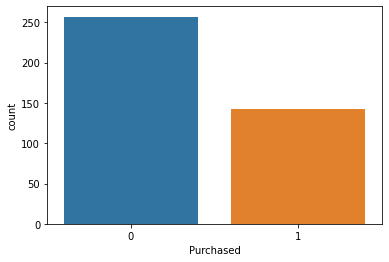

In [36]:
sn.countplot(dataset['Purchased'],label="Count")
plt.show()

In [37]:
# diviser les données en attributs et étiquettes (labes)

X = dataset.iloc[:, [2,3]].values

y= dataset.iloc[:,4].values

In [38]:
# Splitting du dataset Training set and Test set (80%,20%)


from sklearn.model_selection import train_test_split
X_train, X_test, y__train, y_test=train_test_split(X,y, test_size=0.20)


#Over-sampling using SMOTE (Si besoin)

In [ ]:
#X = dataset.loc[:, dataset.columns != 'y']
#y = dataset.loc[:, dataset.columns == 'y']
#from imblearn.over_sampling import SMOTE
#os = SMOTE(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#columns = X_train.columns
#os_data_X,os_data_y=os.fit_sample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
#print("length of oversampled data is ",len(os_data_X))
#print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
#print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
#print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
#print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [40]:
# Feature Scaling / Mise en echelle: Normalisation & Standardisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Normalisation
#minmaxscaler=MinMaxScaler()
#X_train_n=minmaxscaler.fit_transform(X_train)
#X_test_n=minmaxscaler.fit_transform(X_test)

#Standardisation
standarscaler= StandardScaler()
X_train=standarscaler.fit_transform(X_train)
X_test=standarscaler.fit_transform(X_test)


In [45]:
#Instanciation du modèle
modele_regLog = LogisticRegression(penalty='none')
# Apprentissage 
modele_regLog.fit(X_train_n, y__train)
#Prédiction
y_pred=modele_regLog.predict(X_test)


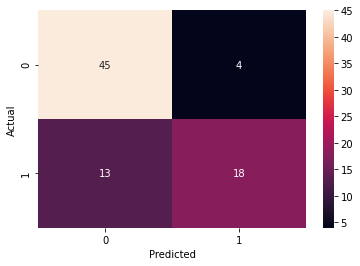

In [46]:
#Evaluation des performances
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        49
           1       0.82      0.58      0.68        31

    accuracy                           0.79        80
   macro avg       0.80      0.75      0.76        80
weighted avg       0.79      0.79      0.78        80

